In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("Perrin Freres monthly champagne sales millions.csv")
df

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0
...,...,...
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN


In [3]:
df = df.dropna()
df

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0
...,...,...
100,1972-05,4618.0
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0


here the month is in string...to make it time series data we should converft it into datetime format

In [4]:
df['Month']=pd.to_datetime(df['Month'])

C:\Users\anudh\AppData\Local\Temp\ipykernel_25264\1420265631.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month']=pd.to_datetime(df['Month'])


the month is set as index so that it becomes a time series data..else it would be just rows

In [5]:
df.set_index(df['Month'],inplace=True)
df

,Month,Perrin Freres monthly champagne sales millions ?64-?72
Month,,
1964-01-01,1964-01-01,2815.0
1964-02-01,1964-02-01,2672.0
1964-03-01,1964-03-01,2755.0
1964-04-01,1964-04-01,2721.0
1964-05-01,1964-05-01,2946.0
...,...,...
1972-05-01,1972-05-01,4618.0
1972-06-01,1972-06-01,5312.0
1972-07-01,1972-07-01,4298.0


testing of data whether stationary or not

In [6]:
df.columns=['Month','Sales']
df

,Month,Sales
Month,,
1964-01-01,1964-01-01,2815.0
1964-02-01,1964-02-01,2672.0
1964-03-01,1964-03-01,2755.0
1964-04-01,1964-04-01,2721.0
1964-05-01,1964-05-01,2946.0
...,...,...
1972-05-01,1972-05-01,4618.0
1972-06-01,1972-06-01,5312.0
1972-07-01,1972-07-01,4298.0


In [7]:
from statsmodels.tsa.stattools import adfuller

In [8]:
result=adfuller(df['Sales'])
result[0]


np.float64(-1.8335930563276195)

In [9]:
result[1]

np.float64(0.3639157716602467)

In [25]:
def adfuller_test(sales):
    labels=['test statistic','p value','lags used','no of observation']
    test_result=adfuller(sales)
    for value,label in zip(test_result,labels):
        print(label+' : '+str(value))
    if test_result[1]<=0.05:
        print("reject null hypothesis : stationary")
    else:
        print("non stationry")       

In [26]:
adfuller_test(df['Sales'])

test statistic : -1.8335930563276195
p value : 0.3639157716602467
lags used : 11
no of observation : 93
non stationry


differencing

In [27]:
df['saesonal difference']=df['Sales']-df['Sales'].shift(12)
df.head(14)

C:\Users\anudh\AppData\Local\Temp\ipykernel_25264\1540177740.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['saesonal difference']=df['Sales']-df['Sales'].shift(12)


,Month,Sales,saesonal difference
Month,,,
1964-01-01,1964-01-01,2815.0,NaN
1964-02-01,1964-02-01,2672.0,NaN
1964-03-01,1964-03-01,2755.0,NaN
1964-04-01,1964-04-01,2721.0,NaN
1964-05-01,1964-05-01,2946.0,NaN
1964-06-01,1964-06-01,3036.0,NaN
1964-07-01,1964-07-01,2282.0,NaN
1964-08-01,1964-08-01,2212.0,NaN
1964-09-01,1964-09-01,2922.0,NaN


In [28]:
adfuller_test(df['saesonal difference'].dropna())

test statistic : -7.626619157213166
p value : 2.0605796968136632e-11
lags used : 0
no of observation : 92
reject null hypothesis : stationary


In [29]:
df['saesonal difference'].dropna()
df

,Month,Sales,saesonal difference
Month,,,
1964-01-01,1964-01-01,2815.0,NaN
1964-02-01,1964-02-01,2672.0,NaN
1964-03-01,1964-03-01,2755.0,NaN
1964-04-01,1964-04-01,2721.0,NaN
1964-05-01,1964-05-01,2946.0,NaN
...,...,...,...
1972-05-01,1972-05-01,4618.0,-392.0
1972-06-01,1972-06-01,5312.0,438.0
1972-07-01,1972-07-01,4298.0,-335.0


In [30]:
adfuller_test(df['saesonal difference'].dropna())

test statistic : -7.626619157213166
p value : 2.0605796968136632e-11
lags used : 0
no of observation : 92
reject null hypothesis : stationary


<Axes: xlabel='Month'>

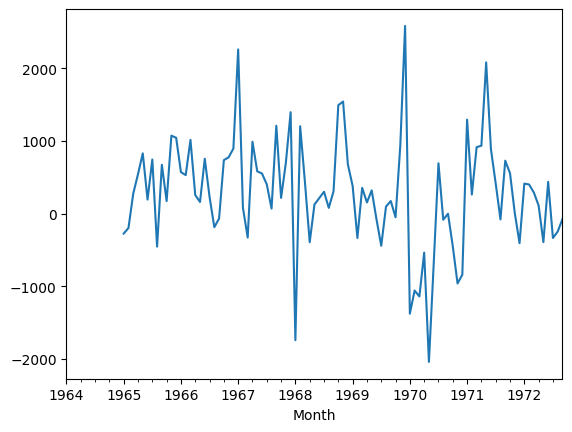

In [31]:
df['saesonal difference'].plot()

auto regression 
plot the pacf(partial auto correlation) graph to analyse the value of p 
the lag at which the last significant spike occurs in the plot


In [33]:
import statsmodels.api as sm

In [32]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

<Figure size 1200x800 with 0 Axes>

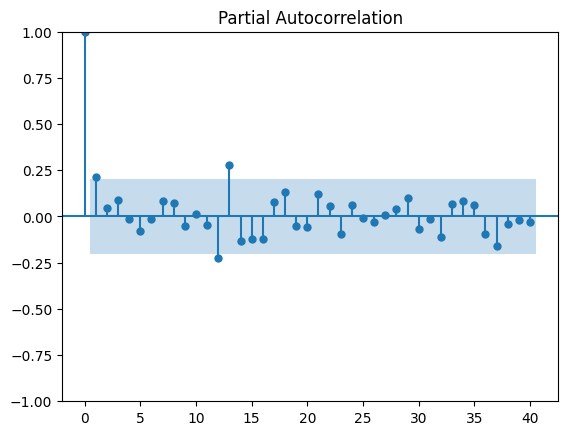

In [36]:
plt.figure(figsize=(12,8))
fig=sm.graphics.tsa.plot_pacf(df['saesonal difference'].dropna(),lags=40)

Moving average
the value of q is to be determined using auto correlation
the lag at which the last significant spike occurs in the plot

<Figure size 1200x800 with 0 Axes>

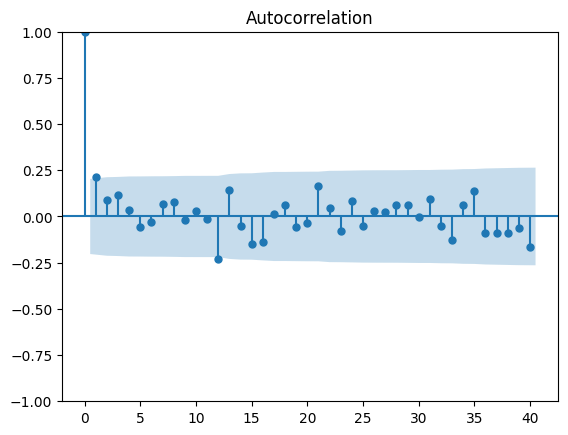

In [38]:
plt.figure(figsize=(12,8))
fig=sm.graphics.tsa.plot_acf(df['saesonal difference'].dropna(),lags=40)

In [41]:
from statsmodels.tsa.arima.model import ARIMA

In [42]:
model=ARIMA(df['Sales'],order=(1,1,1))
model_fit=model.fit()

c:\Users\anudh\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\anudh\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\anudh\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [43]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                  105
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -952.814
Date:                Wed, 18 Jun 2025   AIC                           1911.627
Time:                        11:57:34   BIC                           1919.560
Sample:                    01-01-1964   HQIC                          1914.841
                         - 09-01-1972                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4545      0.114      3.999      0.000       0.232       0.677
ma.L1         -0.9666      0.056    -17.316      0.000      -1.076      -0.857
sigma2      5.226e+06   6.17e+05      8.473      0.000    4.02e+06    6.43e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.91   Jarque-Bera (JB):                 2.59
Prob(Q):                              0.34   Prob(JB):                         0.27
Heteroskedasticity (H):               3.40   Skew:                             0.05
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

c:\Users\anudh\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['step']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
C:\Users\anudh\AppData\Local\Temp\ipykernel_25264\2201429923.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['forecasting']=model_fit.forecast(step=5)


<Axes: xlabel='Month'>

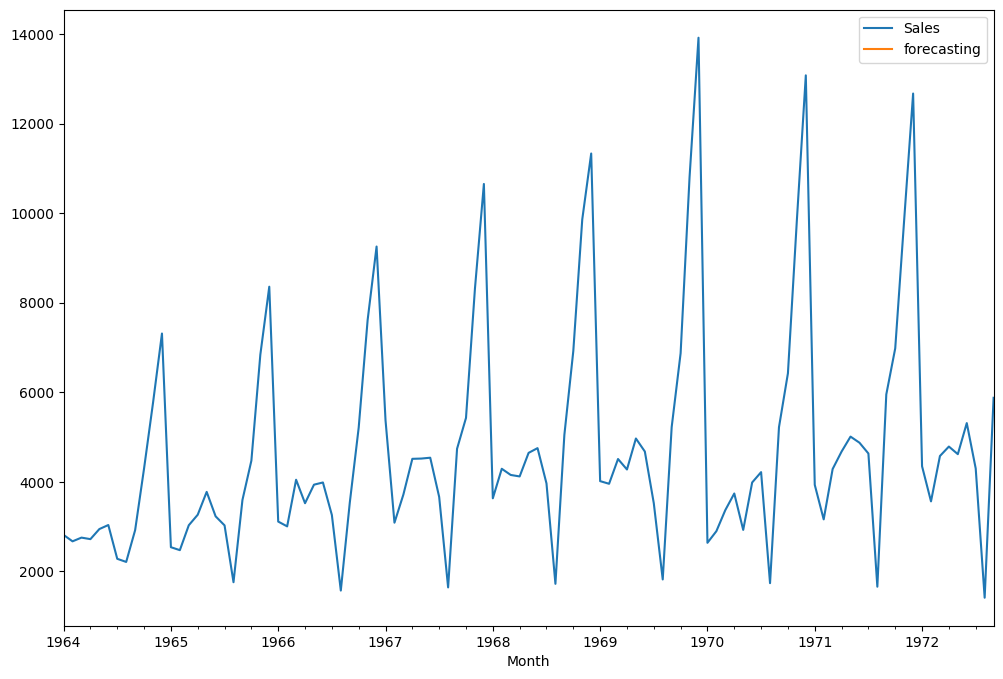

In [47]:
df['forecasting']=model_fit.forecast(step=5)
df[['Sales','forecasting']].plot(figsize=(12,8))

In [48]:
sarima_model=sm.tsa.statespace.SARIMAX(df['Sales'],order=(1,1,1),seasonal_order=(1,1,1,12))
results=sarima_model.fit()

c:\Users\anudh\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\anudh\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


C:\Users\anudh\AppData\Local\Temp\ipykernel_25264\2107738993.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['forecasting_sarima']=results.predict(start=90,end=103,dynamic=True)


<Axes: xlabel='Month'>

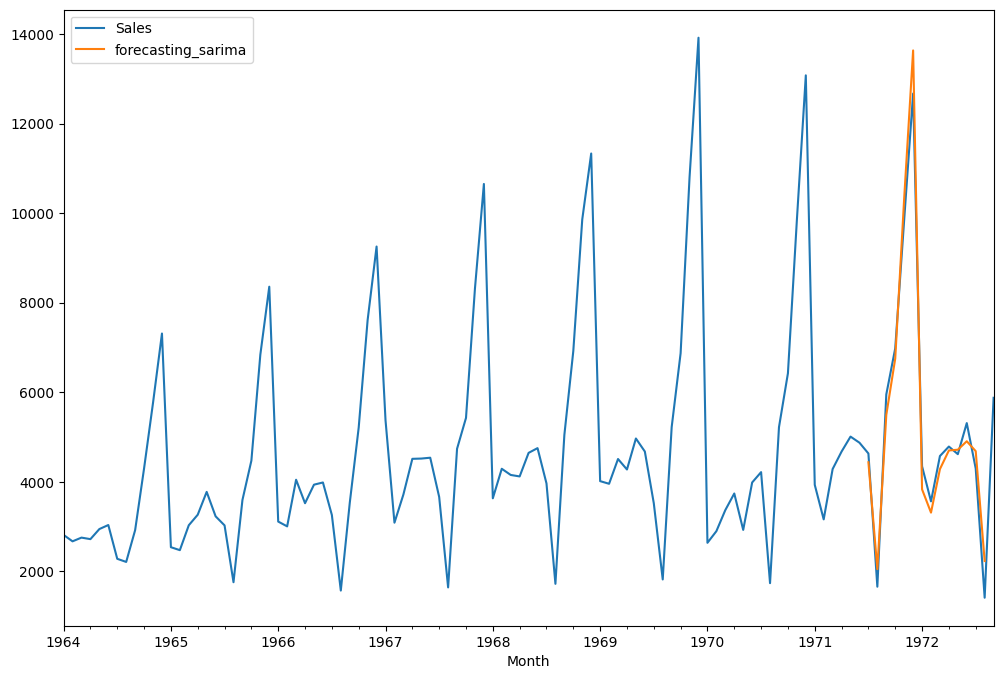

In [51]:
df['forecasting_sarima']=results.predict(start=90,end=103,dynamic=True)
df[['Sales','forecasting_sarima']].plot(figsize=(12,8))